# ARIMA model

## Introduction to time series and stationarity 

Components 
- trend
- seasonality - repeating pattern with fixed period
- cyclicality - repeating patterns but no fixed period

white noise
- series has uncorrelated values. does not depend on the value before.

Stationarity
- must fullfill three criteria 1. zero trend 2. variance is constant 3. autocorrelation is constat

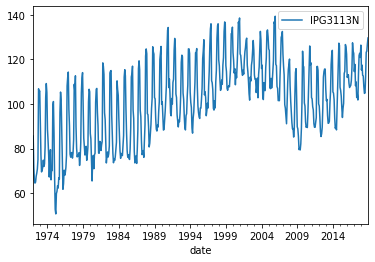

In [1]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as  np

# Load in the time series
candy = pd.read_csv('data/candy_production.csv', 
            index_col='date',
            parse_dates=True)

# Plot and show the time series on axis ax1
fig, ax1 = plt.subplots()
candy.plot(ax=ax1)
plt.show()

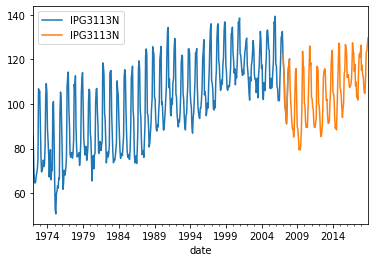

In [6]:
# Split the data into a train and test set
candy_train = candy.loc[:'2007']
candy_test = candy.loc['2007':]

# Create an axis
fig, ax = plt.subplots()

# Plot the train and test sets on the axis ax
candy_train.plot(ax=ax)
candy_test.plot(ax=ax)
plt.show()

non-Stationary trend Test : Augmented dicky-fuller test
null hypothesis; series is stationary 

In [2]:
# Import augmented dicky-fuller test function
from statsmodels.tsa.stattools import adfuller

earthquake = pd.read_csv("data/earthquakes.csv", parse_dates=True, index_col='date')

# Run test
result = adfuller(earthquake["earthquakes_per_year"])

# Print test statistic
print(result[0])

# Print p-value
print(result[1])

# Print critical values
print(result[4]) 

-3.183192251191782
0.02097842525600371
{'1%': -3.5003788874873405, '5%': -2.8921519665075235, '10%': -2.5830997960069446}


<AxesSubplot:xlabel='date'>

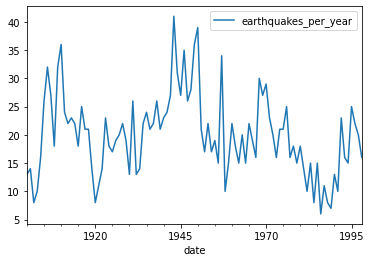

In [18]:
earthquake.plot(y='earthquakes_per_year')

In [3]:
amazon = pd.read_csv("data/amazon_close.csv", parse_dates=True, index_col="date")
# Calculate the first difference and drop the nans
amazon_diff = amazon.diff()
amazon_diff = amazon_diff.dropna()

# Run test and print
result_diff = adfuller(amazon_diff['close'])
print(result_diff)

# Calculate log-return and drop nans
amazon_log = np.log(amazon/amazon.shift(1))
amazon_log = amazon_log.dropna()

# Run test and print
result_log = adfuller(amazon_log['close'])
print(result_log)

(-7.20357948881123, 2.331271725487383e-10, 23, 1234, {'1%': -3.435660336370594, '5%': -2.863885022214541, '10%': -2.568018522153254}, 10764.626718933836)
(-34.91574853605969, 0.0, 0, 1257, {'1%': -3.4355629707955395, '5%': -2.863842063387667, '10%': -2.567995644141416}, -6245.723147672197)


$$ log\_return(y_t) = log(\frac{y_t}{y_{t-1}})$$
Notice that both the differenced and the log-return transformed time series have a small p-value, but the log transformed time series has a much more negative test statistic. This means the log-return tranformation is better.

AR Model (Autoregressive) regress value at the previous step. Order p (using p previous step $ y_t \dots y_{t-p}$)
MA model (Moving average)

ARMA = AR + MA


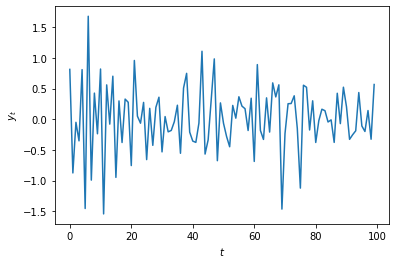

In [4]:
# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(1)

# Set coefficients
ar_coefs = [1]
ma_coefs = [1, -0.7]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

In [11]:
from statsmodels.tsa.arima.model import ARIMA 
# Instantiate the model
model = ARIMA(earthquake["earthquakes_per_year"], order=(3,0,1))

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())

c:\Users\Hazrul Akmal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\Hazrul Akmal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\Hazrul Akmal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


                                SARIMAX Results                                 
Dep. Variable:     earthquakes_per_year   No. Observations:                   99
Model:                   ARIMA(3, 0, 1)   Log Likelihood                -315.673
Date:                  Thu, 21 Jul 2022   AIC                            643.345
Time:                          10:06:59   BIC                            658.916
Sample:                      01-01-1900   HQIC                           649.645
                           - 01-01-1998                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.6453      2.233      8.798      0.000      15.269      24.022
ar.L1          0.5795      0.645      0.899      0.369      -0.684       1.843
ar.L2          0.0251      0.308    

In [ ]:
# Instantiate the model
model = ARMA(hospital["wait_times_hrs"], order=(2,1), exog=hospital['nurse_count'])

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())

C:\Users\Hazrul Akmal\AppData\Local\Temp\ipykernel_3648\1421715453.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  amazon_short = amazon.loc['2018-01-01':,:]
c:\Users\Hazrul Akmal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hazrul Akmal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hazrul Akmal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, 

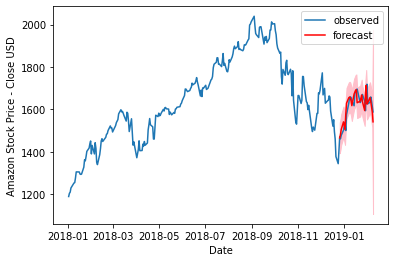

In [28]:
amazon_short = amazon.loc['2018-01-01':,:]
model = ARIMA(amazon_short["close"], order= (2,0,1))
results = model.fit()

# Generate predictions
one_step_forecast = results.get_prediction(end=30)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean


# Get confidence intervals of  predictions
confidence_intervals = one_step_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

# plot the amazon data
plt.plot(amazon_short.index, amazon_short, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

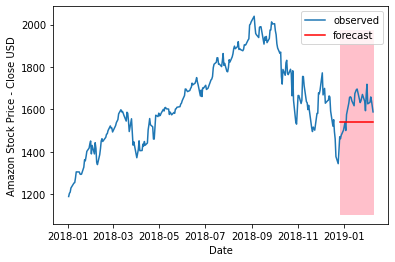

In [29]:
# Generate predictions
dynamic_forecast = results.get_prediction(end=30, dynamic=True)

# Extract prediction mean
mean_forecast = dynamic_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = dynamic_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

# plot the amazon data
plt.plot(amazon_short.index, amazon_short, label='observed')

# plot your mean forecast
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
         upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Take the first difference of the data
amazon_diff = amazon.diff().dropna()

# Create ARMA(2,2) model
arma = SARIMAX(amazon_diff, order=(2,0,2))

# Fit model
arma_results = arma.fit()

# Print fit summary
print(arma_results.summary())

c:\Users\Hazrul Akmal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hazrul Akmal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hazrul Akmal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hazrul Akmal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has bee

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1258
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -5534.654
Date:                Thu, 21 Jul 2022   AIC                          11079.308
Time:                        10:42:05   BIC                          11104.995
Sample:                             0   HQIC                         11088.962
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1773      0.103     -1.723      0.085      -0.379       0.024
ar.L2          0.7722      0.105      7.352      0.000       0.566       0.978
ma.L1          0.1639      0.098      1.669      0.0

In [33]:
# Make arma forecast of next 10 differences
arma_diff_forecast = arma_results.get_forecast(steps=10).predicted_mean

# Integrate the difference forecast
arma_int_forecast = np.cumsum(arma_diff_forecast)

# Make absolute value forecast
arma_value_forecast = arma_int_forecast + amazon.iloc[-1,0]

# Print forecast
print(arma_value_forecast)

1258    359.999388
1259    360.587838
1260    359.811248
1261    360.403300
1262    359.698675
1263    360.280753
1264    359.633468
1265    360.197680
1266    359.597839
1267    360.139846
Name: predicted_mean, dtype: float64


c:\Users\Hazrul Akmal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


c:\Users\Hazrul Akmal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


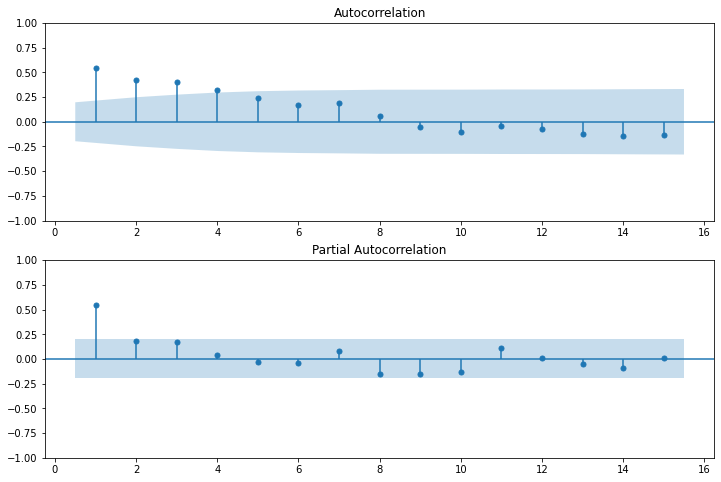

c:\Users\Hazrul Akmal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\Hazrul Akmal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [39]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# Plot ACF and PACF
plot_acf(earthquake['earthquakes_per_year'], lags=15, zero=False, ax=ax1)
plot_pacf(earthquake['earthquakes_per_year'], lags=15, zero=False, ax=ax2)

# Show plot
plt.show()

# Instantiate model
model = SARIMAX(earthquake['earthquakes_per_year'], order=(1,0,0))

# Train model
results = model.fit()

## AIC & BIC

- Lower AIC means better model
- AIC likes to choose simpler model with lower order (avoid overfitting)
- BIC sames like AIC but BIC penalises higher order model more than AIC (BIC prefer simpler model more than AIC)
- usually both model will suggest same model but if they contradict then it's up the us. for explanatory model choose BIC while for predictive model choose AIC

In [42]:
# Create empty list to store search results
order_aic_bic=[]

# Loop over p values from 0-2
for p in range(3):
  # Loop over q values from 0-2
    for q in range(3):
      try:
      	# create and fit ARMA(p,q) model
        model = SARIMAX(earthquake['earthquakes_per_year'], order=(p,0,q))
        results = model.fit()
        
        # Append order and results tuple
        order_aic_bic.append((p,q, results.aic, results.bic))
      except:
        order_aic_bic.append((p,q, None, None))

# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

c:\Users\Hazrul Akmal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\Hazrul Akmal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\Hazrul Akmal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\Hazrul Akmal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\Haz

   p  q         AIC         BIC
4  1  1  647.132300  654.917660
5  1  2  648.738566  659.119046
7  2  1  648.842840  659.223319
8  2  2  648.850644  661.826244
6  2  0  656.028374  663.813734
3  1  0  666.645526  671.835765
2  0  2  761.067479  768.852838
1  0  1  799.674173  804.864412
0  0  0  888.429772  891.024892
   p  q         AIC         BIC
4  1  1  647.132300  654.917660
5  1  2  648.738566  659.119046
7  2  1  648.842840  659.223319
8  2  2  648.850644  661.826244
6  2  0  656.028374  663.813734
3  1  0  666.645526  671.835765
2  0  2  761.067479  768.852838
1  0  1  799.674173  804.864412
0  0  0  888.429772  891.024892


c:\Users\Hazrul Akmal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\Hazrul Akmal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


## Model Agnostics

prob(Q) : p.value for null hypothesis that the residuals are uncorrelated
prob(JB) : p-value for null hypothesis that the residuals are normal

c:\Users\Hazrul Akmal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\Hazrul Akmal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


4.7556256695276415


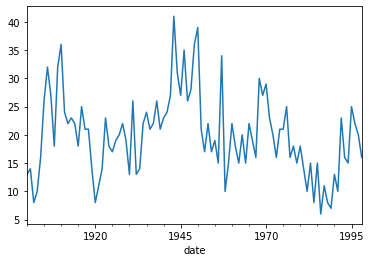

In [43]:
# Fit model
model = SARIMAX(earthquake['earthquakes_per_year'], order=(1,0,1))
results = model.fit()

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(results.resid))

# Print mean absolute error
print(mae)

# Make plot of time series for comparison
earthquake['earthquakes_per_year'].plot()
plt.show()

mean error is about 4-5 earthquakes per year. we have plotted the time series so that you can see how the MAE compares to the spread of the time series. Considering that there are about 20 earthquakes per year that is not too bad.

c:\Users\Hazrul Akmal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\Hazrul Akmal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


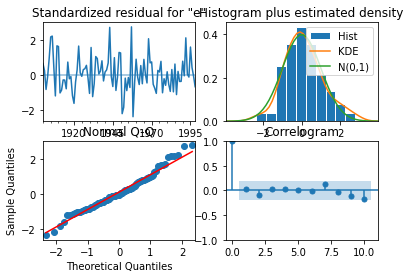

In [44]:
# Create and fit model
model = SARIMAX(earthquake['earthquakes_per_year'], order=(1,0,1))
results=model.fit()

# Create the 4 diagostics plots
results.plot_diagnostics()
plt.show()

|Test  | Good fit |
| --- | --- |
|Standardized residual	|  There are no obvious patterns in the residuals|
|Histogram plus kde estimate	|The KDE curve should be very similar to the normal distribution|
|Normal Q-Q	|Most of the data points should lie on the straight line|
|Correlogram	|95% of correlations for lag greater than zero should not be significant|

#### Box-Jenkins methodology
1. Identification 
    - is the series stationary (run Dick-fuller test), is the series sesonal? (run acf, pacf) 
    - if not then do transforming/differentating df.diff, np.log, np.sqrt df - df.rolling(20).mean()
    - Pick optimal p and q by gridsearch/aic/bic (model selection)


2. Estimation
    - use data to train the model coefficient
    - pick right features

3. Model diagnostics 
    - all the four plots
    - diagnostics from summary 
    
Caveats
seasonal differencing, D should be 0 or 1
D+d should be equal to or less than 2

image.png

Seasonal time series. 

- predicted and repeated patterns 
- repeats after amount of time

time series = seosonal + trend + residual


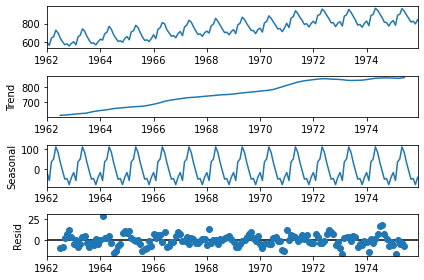

In [51]:
milk_production = pd.read_csv('data\milk_production.csv', parse_dates=True, index_col = 'date')

# Import seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(milk_production, 
                            period=12)

# Plot decomposition
decomp.plot()
plt.show()

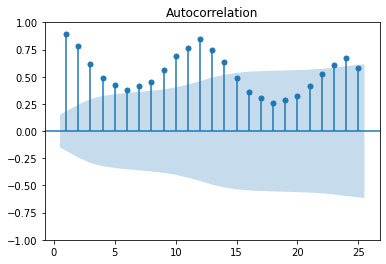

In [52]:
# Create figure and subplot
fig, ax1 = plt.subplots()

# Plot the ACF on ax1
plot_acf(milk_production, lags=25, zero=False,  ax=ax1)

# Show figure
plt.show()

ARIMA + Sesonal = SARIMAX

non-sesonal order 
- p autoregresive order
- d differencing order
- q moving average order 

sesonal order
- P seasonal autoregressive order
- D seasonal differencing order
- Q seasonal moving average order

### Sesonal differencing

substract time series value of one cycle ago
s is number of time lags needed to complete one cycle
$$ \triangle  y_t = y_t - y_{t-s}$$

### Automation 

In [55]:
import pmdarima as pm

model = pm.auto_arima(milk_production,
        seasonal=True, m=12, d=1, D=1, 
                      start_p=1, start_q=1,
                      max_p=10, max_q=10,
                      max_P=10, max_Q=10,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True) 
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1069.775, Time=0.91 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1119.969, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1081.584, Time=0.16 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1066.296, Time=0.43 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1114.995, Time=0.08 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1068.030, Time=0.51 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1067.976, Time=1.60 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1082.123, Time=0.37 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=3.28 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1072.280, Time=0.18 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1068.064, Time=0.54 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=1067.796, Time=0.37 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1066.207, Time=0.29 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1114.845, Time=0.06 sec
 ARIMA(1,1,0)(1,1,1)[12]

c:\Users\Hazrul Akmal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Hazrul Akmal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


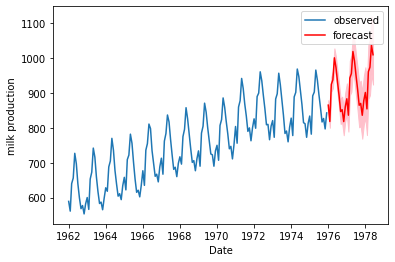

In [87]:
milk_model = SARIMAX(milk_production, order=(1,1,0), seasonal_order=(0,1,1,12))
results = milk_model.fit()

# Generate predictions
one_step_forecast = results.get_forecast(steps=30)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

dates = mean_forecast.index
# Get confidence intervals of  predictions
confidence_intervals = one_step_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower pounds_per_cow']
upper_limits = confidence_intervals.loc[:,'upper pounds_per_cow']

# plot the amazon data
plt.plot(milk_production.index, milk_production["pounds_per_cow"], label='observed')

# plot your mean predictions
plt.plot(dates, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(dates, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('milk production')
plt.legend()
plt.show()

Check wether seasonality is strong or weak
- stong : always use seasonal differencing 
- weak : use seasonal differencing when necessary

Check wether the seasonality is multplicative or additive 
- additive, proceed with seasonal differencing
- multiplicative, log differencing transform a then seasonal differencing 
 

In [81]:
co2 = pd.read_csv("data\co2.csv", parse_dates=True, index_col='date')

# Create model object
model = SARIMAX(co2, 
                order=(1,1,1), 
                seasonal_order=(0,1,1,12), 
                trend='c')
# Fit model
results = model.fit()
results.summary()

c:\Users\Hazrul Akmal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Hazrul Akmal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            CO2_ppm   No. Observations:                  727
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -179.718
Date:                            Thu, 21 Jul 2022   AIC                            369.437
Time:                                    19:46:04   BIC                            392.291
Sample:                                03-01-1958   HQIC                           378.263
                                     - 09-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0017      0.001      2.805      0.005       0.001       0.003
ar.L1          0.2414      0.078      3.075      0.002       0.088       0.395
ma.L1         -0.6081      0.065     -9.297      0.000      -0.736      -0.480
ma.S.L12      -0.8820      0.019    -45.501      0.000      -0.920      -0.844
sigma2         0.0944      0.005     20.747      0.000       0.086       0.103
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 6.19
Prob(Q):                              0.78   Prob(JB):                         0.05
Heteroskedasticity (H):               1.13   Skew:                             0.00
Prob(H) (two-sided):                  0.33   Kurtosis:                         3.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

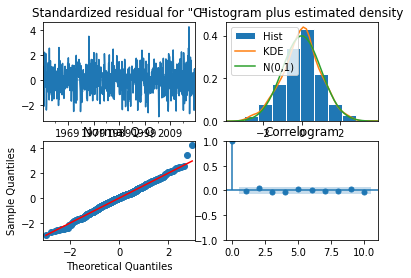

In [82]:
# Plot common diagnostics
results.plot_diagnostics()
plt.show()

graphs look fine. no obvious pattern on residuals plot (uncorrelated). Q-Q plot and histogram indicate residuals are normally distributed.  

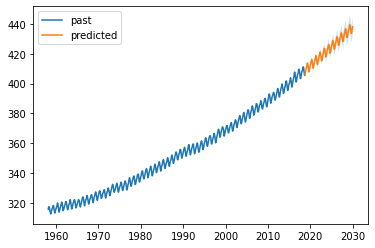

438.1954178104319
lower CO2_ppm    432.112141
upper CO2_ppm    444.278694
Name: 2030-01-01 00:00:00, dtype: float64


In [85]:
# Create forecast object
forecast_object = results.get_forecast(steps=136)

# Extract predicted mean attribute
mean = forecast_object.predicted_mean

# Calculate the confidence intervals
conf_int = forecast_object.conf_int()

# Extract the forecast dates
dates = mean.index

# Plot past CO2 levels
plt.plot(co2.index, co2, label='past')

# Plot the prediction means as line
plt.plot(dates, mean, label='predicted')

# Shade between the confidence intervals
plt.fill_between(dates, conf_int["lower CO2_ppm"], conf_int['upper CO2_ppm'], alpha=0.2)

# Plot legend and show figure
plt.legend()
plt.show()

# Print last predicted mean
print(mean.iloc[-1])

# Print last confidence interval
print(conf_int.iloc[-1])


estimate says that CO2 will increase by roughly another 35ppm from October 2018 to January 2030.